In [1]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn import manifold
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame
import os

import random
import json

In [2]:
def DBSCAN_cluster(file, save_dir, visualize=False):
  data=np.load(file)
  
  gm = DBSCAN(eps=0.5).fit(data)
  pred = gm.labels_
  np.save(f'{save_dir}/{file}_DBSCAN_pred.npy', pred)
  
  if visualize:
    tsne2d = manifold.TSNE(n_components=2, init='pca', random_state=1000)
    vis2d = tsne2d.fit_transform(data)

    df2d = DataFrame({'x':vis2d[:,0], 'y':vis2d[:,1], 'label':pred})
    groups2d = df2d.groupby('label')

    ig, ax = plt.subplots()
    for name, group in groups2d:
      ax.scatter(group.x, group.y, s=1, label=name)

    ax.legend()
    plt.savefig(f'{save_dir}/{file}_{num}.png')
    plt.show() 

In [3]:
DBSCAN_cluster('zh_resid_2015-08.npy','DBSCAN_result')

In [5]:
label = np.load('DBSCAN_result/zh_resid_2015-08.npy_DBSCAN_pred.npy') #CHANGE HERE
data = np.load('zh_resid_2015-08.npy')
with open('train2_zh_date&name.json') as f:
  names=json.load(f)['names']

In [6]:
target = [13,14] #CHANGE HERE

In [7]:
def plot(data,label,target_class,method,n, names):
    index_of_target_data=[]
    for i in range(data.shape[0]):
        if label[i]==target_class:
            index_of_target_data.append(i)
#     print(index_of_target_data)
    target_data = np.zeros((len(index_of_target_data),data.shape[1],))
    for i in range(len(index_of_target_data)):
        target_data[i] = data[index_of_target_data[i]]
        print(names[index_of_target_data[i]])
    print(target_data.shape)
    avg = np.average(target_data,axis=0)
    chosen1 = random.randint(0,len(index_of_target_data)-1)
    chosen2 = random.randint(0,len(index_of_target_data)-1)
    while chosen2==chosen1:
        chosen2 = random.randint(0,len(index_of_target_data)-1)
    
    plt.figure()
    x = np.linspace(1, 31, num=31)
    plt.plot(x,avg,label='avg')
    plt.plot(x,target_data[chosen1],label='chosen1')
    plt.plot(x,target_data[chosen2],label='chosen2')
    
    plt.legend()
    
    plt.savefig(f'{method}/n={n}_class={target_class}.png')

苏美尔王表_zh.wikipedia.org_all-access_all-agents
加权平均资本成本_zh.wikipedia.org_all-access_all-agents
即使這樣也不是我做的_zh.wikipedia.org_all-access_all-agents
酯化反应_zh.wikipedia.org_all-access_all-agents
哈里·S·杜鲁门_zh.wikipedia.org_all-access_all-agents
日本動畫列表_(年份順)_zh.wikipedia.org_all-access_all-agents
苏美尔王表_zh.wikipedia.org_desktop_all-agents
加权平均资本成本_zh.wikipedia.org_desktop_all-agents
哈里·S·杜鲁门_zh.wikipedia.org_desktop_all-agents
日本動畫列表_(年份順)_zh.wikipedia.org_desktop_all-agents
即使這樣也不是我做的_zh.wikipedia.org_mobile-web_all-agents
酯化反应_zh.wikipedia.org_mobile-web_all-agents
已開發國家_zh.wikipedia.org_mobile-web_all-agents
C_(動畫)_zh.wikipedia.org_mobile-web_all-agents
罩杯_zh.wikipedia.org_mobile-web_all-agents
(15, 31)
古力_zh.wikipedia.org_all-access_all-agents
吳清源_zh.wikipedia.org_all-access_all-agents
李世乭_zh.wikipedia.org_all-access_all-agents
围棋_zh.wikipedia.org_all-access_all-agents
柯洁_zh.wikipedia.org_all-access_all-agents
李昌鎬_zh.wikipedia.org_all-access_all-agents
圍棋棋士列表_zh.wikipedia.org_all-access_all-ag

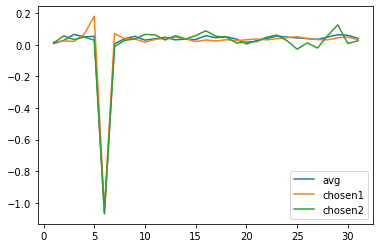

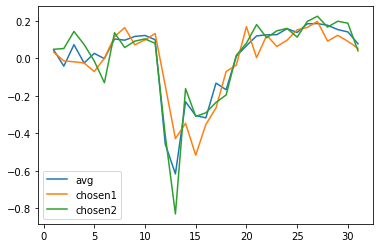

In [8]:
for i in target:
    plot(data,label,i,'DBSCAN_curve',50, names) #CHANGE HERE